In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

- Load the MNIST dataset. MNIST images are 28×28 grayscale → add 1 channel dimension. 

- Normalize pixel values to [0,1]. 

- Labels are one-hot encoded for classification.

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape to (samples, height, width, channels)
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Conv2D: Applies convolution filters → learns patterns like edges.

ReLU: Activation function, adds non-linearity.

MaxPooling2D: Reduces feature map size → faster computation & captures important features.

Flatten → Dense: Connects CNN to fully connected layers for classification.

Softmax: Outputs probabilities for 10 digits.

In [4]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Training uses 90% data for training, 10% for validation.

epochs=10: complete dataset is passed 10 times.

batch_size=32: number of samples per gradient update

In [5]:
history = model.fit(X_train, y_train,
                    validation_split=0.1,
                    epochs=10,
                    batch_size=32)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 47s 27ms/step - accuracy: 0.9083 - loss: 0.3051 - val_accuracy: 0.9838 - val_loss: 0.0540
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.9863 - loss: 0.0464 - val_accuracy: 0.9885 - val_loss: 0.0362
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 45s 27ms/step - accuracy: 0.9898 - loss: 0.0306 - val_accuracy: 0.9908 - val_loss: 0.0335
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 26ms/step - accuracy: 0.9931 - loss: 0.0202 - val_accuracy: 0.9907 - val_loss: 0.0315
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 84s 27ms/step - accuracy: 0.9959 - loss: 0.0127 - val_accuracy: 0.9897 - val_loss: 0.0401
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 44s 26ms/step - accuracy: 0.9956 - loss: 0.0130 - val_accuracy: 0.9928 - val_loss: 0.0352
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9969 - loss: 0.0087 - val_accuracy: 0.9905 - val_loss: 0.0421
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - accuracy: 0.9975 -

In [6]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9890 - loss: 0.0531
Test Accuracy: 99.16%


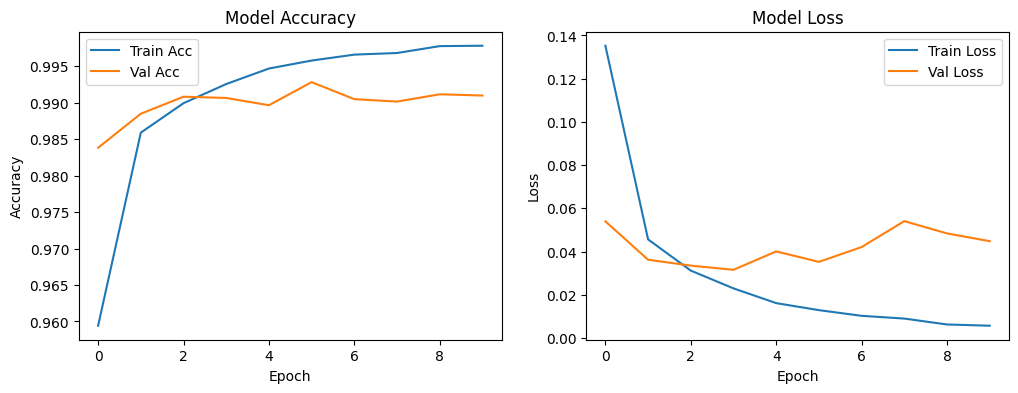

In [7]:
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


np.argmax selects the digit with highest probability.

Useful for testing individual images.

In [16]:
sample = X_test[100].reshape(1,28,28,1)
pred = np.argmax(model.predict(sample))
print(f"Predicted Digit: {pred}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted Digit: 6
